# Import Coffee Prices

In [28]:
import os
cud = os.getcwd()

Import coffee prices from world bank pink sheet dataset. This dataset contains prices for the most relevant commodities world wide. 

In [1]:
wb_link = "https://thedocs.worldbank.org/en/doc/18675f1d1639c7a34d463f59263ba0a2-0050012025/related/CMO-Historical-Data-Monthly.xlsx"

In [2]:
import pandas as pd
df = pd.read_excel(wb_link,sheet_name="Monthly Prices",skiprows=6)

In [5]:
coffee_list = ['COFFEE_ARABIC','COFFEE_ROBUS']

In [6]:
# filter coffee prices
df_c = df[['Unnamed: 0'] + coffee_list]

In [8]:
# set date column
df_c = df_c.rename(columns={'Unnamed: 0':'date_ex'})
df_c[['year','month']] = df_c['date_ex'].str.split('M',expand=True)
df_c['year'] = pd.to_numeric(df_c['year'])
df_c['month'] = pd.to_numeric(df_c['month'])
df_c = df_c.drop('date_ex',axis=1)

In [18]:
# create date time to plot
df_c['date0'] = df_c['year'].astype(str) + '-' + df_c['month'].astype(str)
df_c['date'] = pd.to_datetime(df_c['date0'])
df_c = df_c.drop('date0',axis=1)

In [ ]:
# plot coffee prices and safe figure on figures folder
df_c = df_c.set_index('date')

In [30]:
# create images directory
os.mkdir(cud + "\Images")

<>:2: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
C:\Users\canzolbr\AppData\Local\Temp\ipykernel_34460\1862784412.py:2: SyntaxWarning: invalid escape sequence '\I'
  os.mkdir(cud + "\Images")


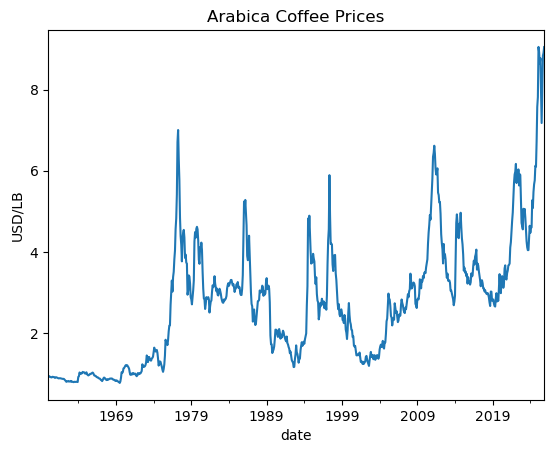

In [34]:
import matplotlib.pyplot as plt
df_c['COFFEE_ARABIC'].plot(title='Arabica Coffee Prices')
plt.ylabel('USD/LB')
plt.savefig(cud + "\\Images\\arabica_price.png")

In [37]:
# save coffee prices on a csv file
df_c.to_csv(cud + "\\Data\\arabica_coffee.csv")